<a href="https://colab.research.google.com/github/LeonardoAgustinSanchez/Jueves-FisicaElectronica-2022/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro a Jupyter Notebook con Google Colab

Google Colab es la plataforma de Google para ejecutar Jupyter Notebooks. Se trata de una herramienta que hace uso de "celdas" o espacios para escribir código y metadata.
<br> El objetivo de esto es integrar en un sólo lugar texto, código, imágenes y otras cosas para ayudar en la experimentación. 
<br>Jupyter Notebook es un entorno de desarrollo utilizado ampliamente en análisis numérico, estadística y machine learning, entre otros campos de la informática, las matemáticas y las ciencias en general.
<br><br>

### Código y metadata

En Google Colab, podemos definir celdas de "código" y celdas de "texto". Si generamos una celda de código, allí podremos escribir pequeños scripts y ejecutarlos. Estos scripts pueden ser tanto funciones larguísimas, como objetos si programamos con el paradigma POO o algo tan simple como una sóla linea de código que calcule la suma de 2 números.

<br>En cambio, si generamos una celda de texto, podremos generar código "markdown", es decir, texto más algunos modificadores que permiten darle formato a ese texto.

<br>De esta manera, creamos código y lo documentamos al mismo tiempo. ¡Esto es muy útil para experimentar y contar los resultados!
<br><br>

### Código: ¿qué tipo de código y cómo se ejecuta?

El lenguaje de programación defacto en Google Colab es Python 3. Anteriormente, se podía usar Python 2 pero al haberse deprecado, sólo se le da soporte a Python 3.

<br>Cabe destacar que Python no es un lenguaje que requiera de un compilador, sino que se ejecuta con un runtime (también llamado "kernel"). Por lo que podemos cambiar el código y volver a correrlo sin necesidad de compilar (atención, para usar Python embebido <i>¡sí se debe compilar!</i>). En el menú "runtime" podemos configurar qué queremos correr (generalmente creamos código en varias celdas, por lo que podemos indicarle si queremos correr una sola, todas, a partir de cierta celda, etc).

<br>Si lo que queremos es ejecutar una sóla celda, podemos hacerlo manteniendo presionado "shift" y dando "enter". Para las celdas de texto, la ejecución es necesaria sólo cuando hacemos un cambio (en la imagen de abajo se verá cómo veo yo el texto mientras lo escribo :-) ).

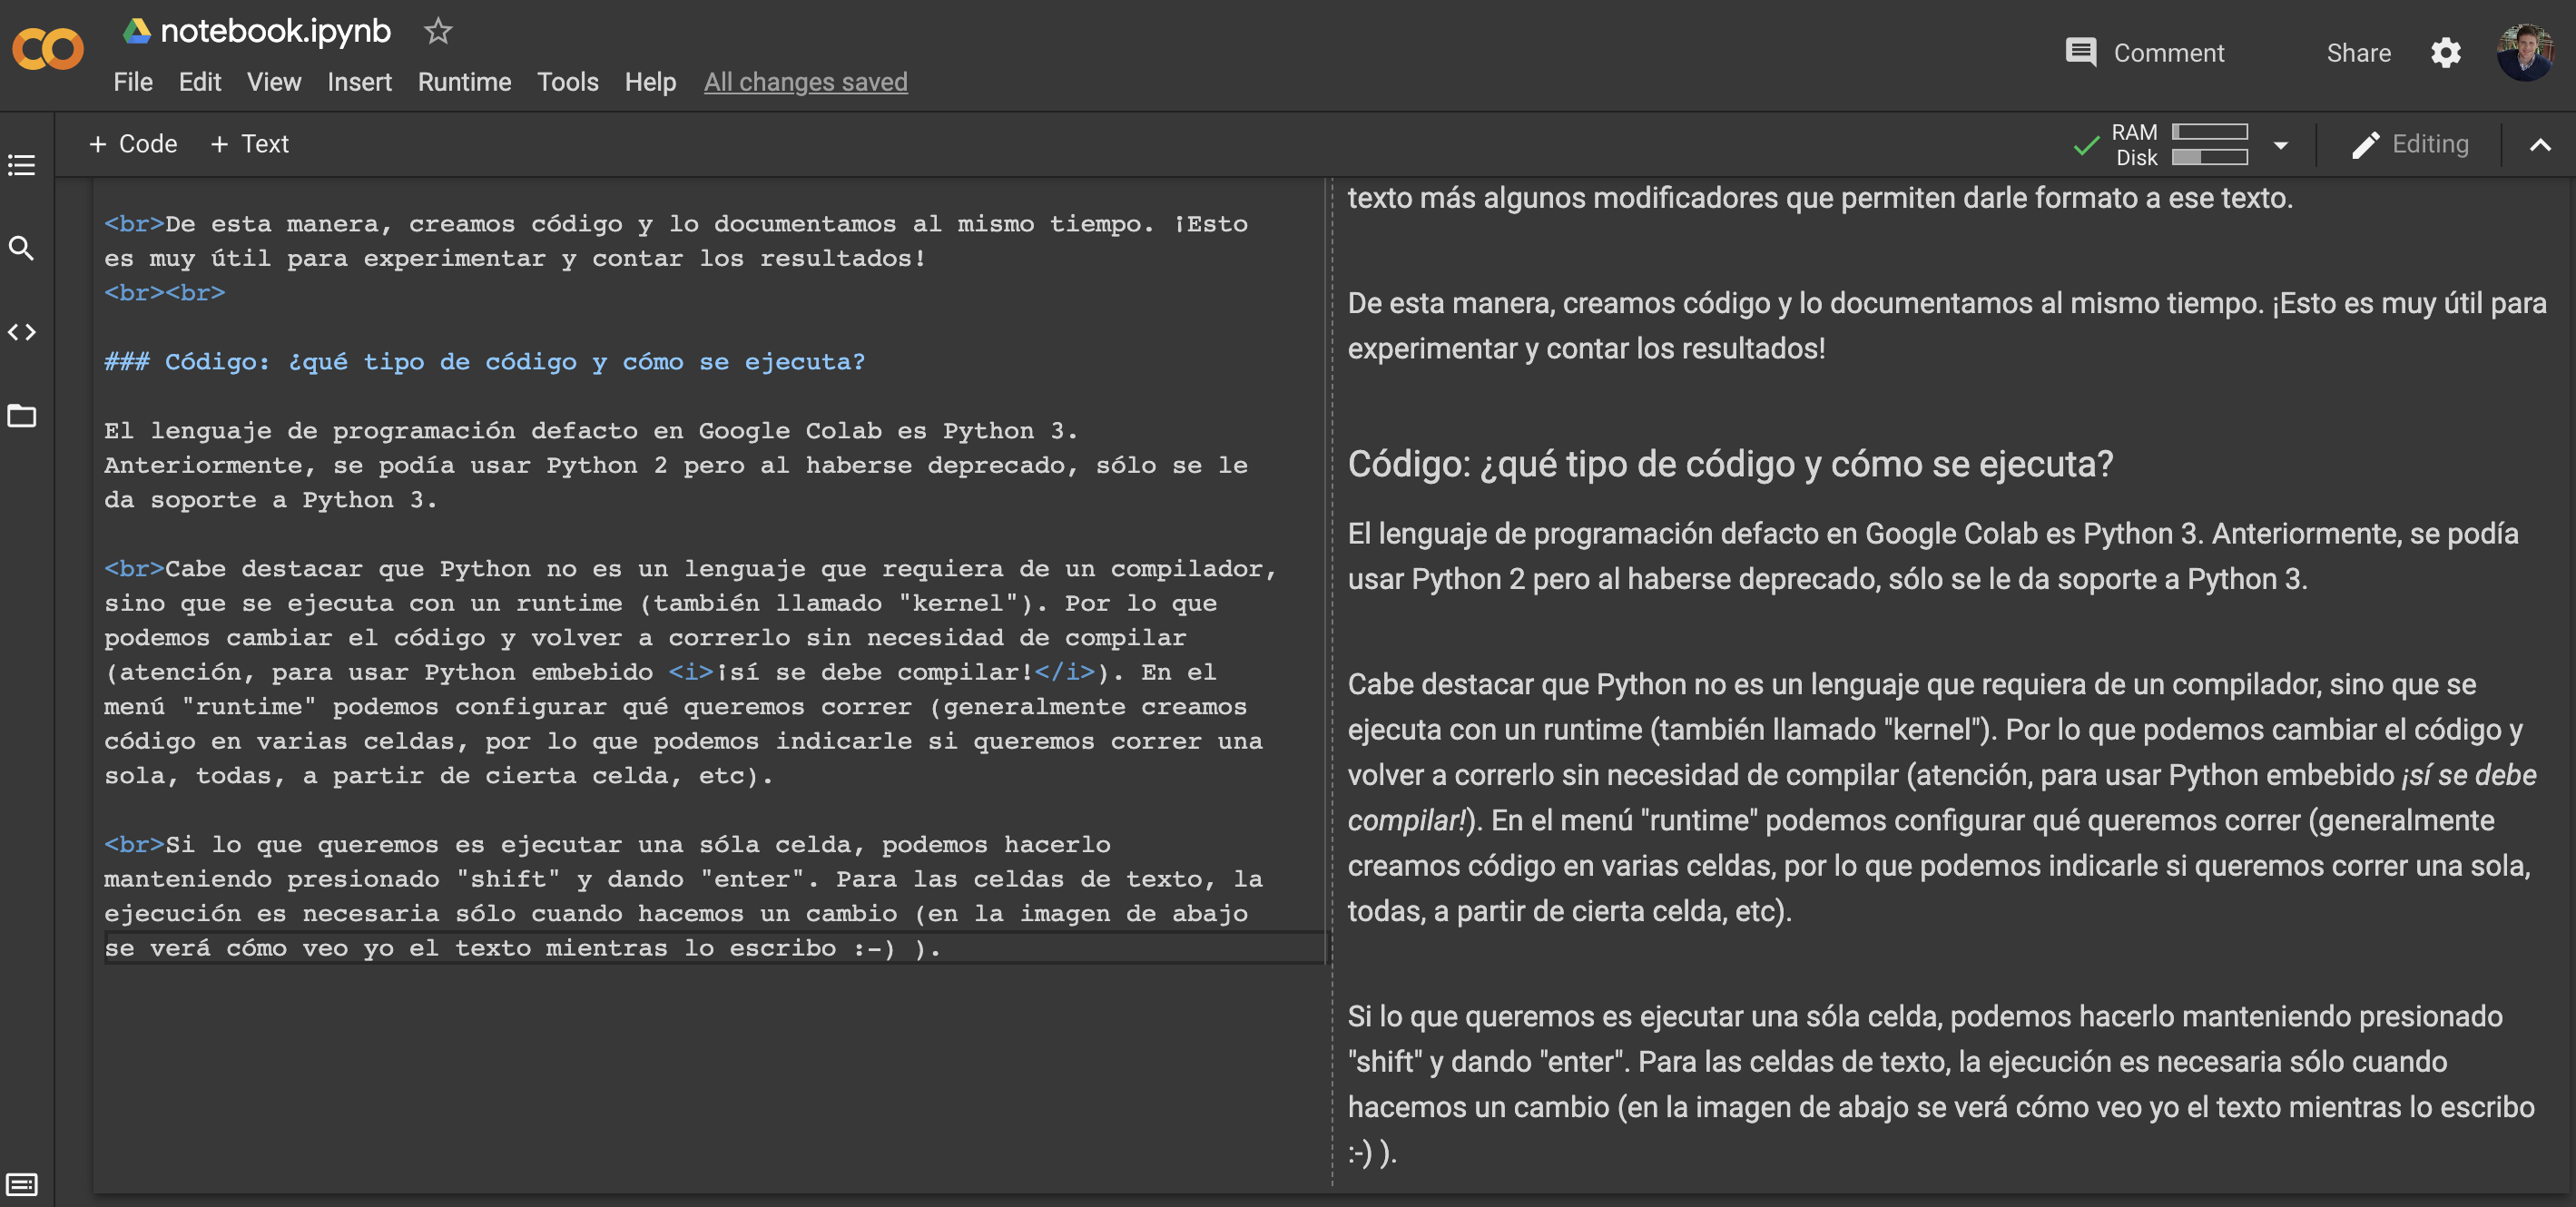

### Ejemplo:
Vamos a escuchar audios, los cuales importo como set de datos (en el universo digital, los audios son una colección de unos y ceros).

In [ ]:
# tengo los audios en Google Drive, asi que cargo "drive" en "colab" (nota: uso el "wildcard" "#" para hacer comentarios)
# Google Drive pide un codigo para vincularse con Colab -es bastante simple-
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# si existieran carpetas viejas, las elimino, asi la demostracion sale limpia
!rm -rf dataset

In [ ]:
# los tengo comprimidos por lo que, los tengo que descomprimir (y ademas, hay un diccionario)
# esto introduce otro "wildcard" de Jupyter: el "!". Seguido a "!" puedo ejecutar un comando de bash (la linea de comandos de Unix)
! unzip '/content/drive/My Drive/Física Electrónica Catedra/11_Colab/01_intro/audios.zip'

Archive:  /content/drive/My Drive/Física Electrónica Catedra/11_Colab/01_intro/audios.zip
   creating: dataset/
   creating: dataset/audios/
  inflating: dataset/.DS_Store       
  inflating: dataset/train.csv       
  inflating: dataset/audios/673acd6f.wav  
  inflating: dataset/audios/82c40c96.wav  
  inflating: dataset/audios/938869a6.wav  
  inflating: dataset/audios/bfb5b77c.wav  
  inflating: dataset/audios/5ae5198b.wav  
  inflating: dataset/audios/e3dbb572.wav  
  inflating: dataset/audios/94934bac.wav  
  inflating: dataset/audios/857e4f34.wav  
  inflating: dataset/audios/bfbda4bc.wav  
  inflating: dataset/audios/a8e4a91e.wav  
  inflating: dataset/audios/f0e7f5da.wav  
  inflating: dataset/audios/b56b8465.wav  
  inflating: dataset/audios/2ae9e186.wav  
  inflating: dataset/audios/04eb6226.wav  
  inflating: dataset/audios/a6665ed2.wav  
  inflating: dataset/audios/abc7ddef.wav  
  inflating: dataset/audios/5435ddab.wav  
  inflating: dataset/audios/f8ffc4fc.wav  
  inflati

In [ ]:
# realizo todos los imports que necesito
# - cada import es una libreria que contiene modulos que puedo usar
# - a su vez, puedo no importar toda la libreria sino solo un modulo 
#   * es el caso de la primera: "from pathlib import Path"
#   * es decir que de la libreria "pathlib" importe el modulo "Path"
from pathlib import Path
import IPython.display as ipd
import librosa
import pandas as pd # pandas por lo general se importa asi!
import numpy as np # lo mismo para numpy!

In [ ]:
# Google Colab también tiene un sistema de archivos.
# El unzip que hicimos antes, descomprime los audios + un diccionario a una carpeta dentro del file system de Google Colab
# Llamo a esas carpetas y la guardo en la variable "AUDIOS_FOLDER"
DATA = Path('dataset/')
AUDIOS_FOLDER = DATA/'audios'

In [ ]:
# dentro de la carpeta "DATA" abro el CSV que contiene el nombre del archivo y unas etiquetas que indican a que se refieren (el diccionario)
# notar que con "pd" hago mencion a Pandas, y le pido que haga un "read_csv", es decir, que lea un CSV
# ademas, le indico que lea las columnas "fname" y "labels"
annotations = pd.read_csv(DATA/'train.csv')[['fname', 'labels']] # el diccionario se llama "train.csv"
annotations.head(12) # esto me devuelve los primeros 12 resultados de la lectura del CSV

,fname,labels
0,001ec0ad.wav,Finger_snapping
1,0026f116.wav,Finger_snapping
2,030d5b55.wav,Finger_snapping
3,037b9243.wav,Marimba_and_xylophone
4,03ea2668.wav,Finger_snapping
5,03f91aaf.wav,Keys_jangling
6,04eb6226.wav,Marimba_and_xylophone
7,0595bce6.wav,Marimba_and_xylophone
8,069d8df9.wav,Finger_snapping
9,076f25a3.wav,Keys_jangling


In [ ]:
# Escuchamos audios
# https://librosa.org/doc/main/generated/librosa.load.html -> cuando queremos saber que hace una funcion o libreria
X_train = annotations['fname'].apply(lambda x: AUDIOS_FOLDER/x).values # guardo todos los nombres de los archivos en "X_train"
i = 6 # este sera el indice del audio a escuchar

# "librosa" me permite recuperar la serie temporal del audio seleccionado y luego, lo guardado en "X_i"
# en la definicion de la libreria, define serie temporal de la siguiente manera:
#     "time series: Typically an audio signal, denoted by y, and represented as a one-dimensional numpy.ndarray of floating-point values. 
#      y[t] corresponds to the amplitude of the waveform at sample t."
X_i, sr = librosa.load(X_train[i], sr = None) 
ipd.Audio(X_i.reshape(-1), rate = sr) # para que me aparezca el reproductor

In [ ]:
len(X_i) # muestra la cantidad de amplitudes que tiene el vector X_i

71168

In [ ]:
# que hace el siguiente codigo?
cnt = 0
#for i in X_i:
#  if cnt < 100:
#    print(i)
#    cnt = cnt + 1

for i in X_i:
  if cnt > 16000 and cnt < 16500:
    print(cnt, i)
  cnt = cnt + 1

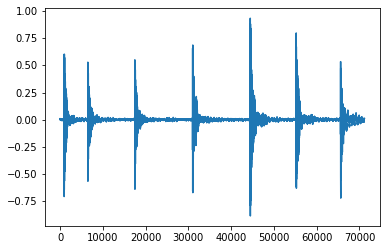

In [ ]:
import matplotlib.pyplot as plt
largo=len(X_i)
y = X_i[0:largo]
x = range(0, largo, 1)
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt
time = np.arange(0,len(X_i))/sr
fig, ax = plt.subplots()
ax.plot(time, X_i)
ax.set(xlabel = 'Time(s)', ylabel = 'sound amplitude')
plt.show()